In [2]:
# install machine gnostic learning packages
# ! pip install machinegnostics # only if not installed

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Small data (with noise) and regression

## Example 1

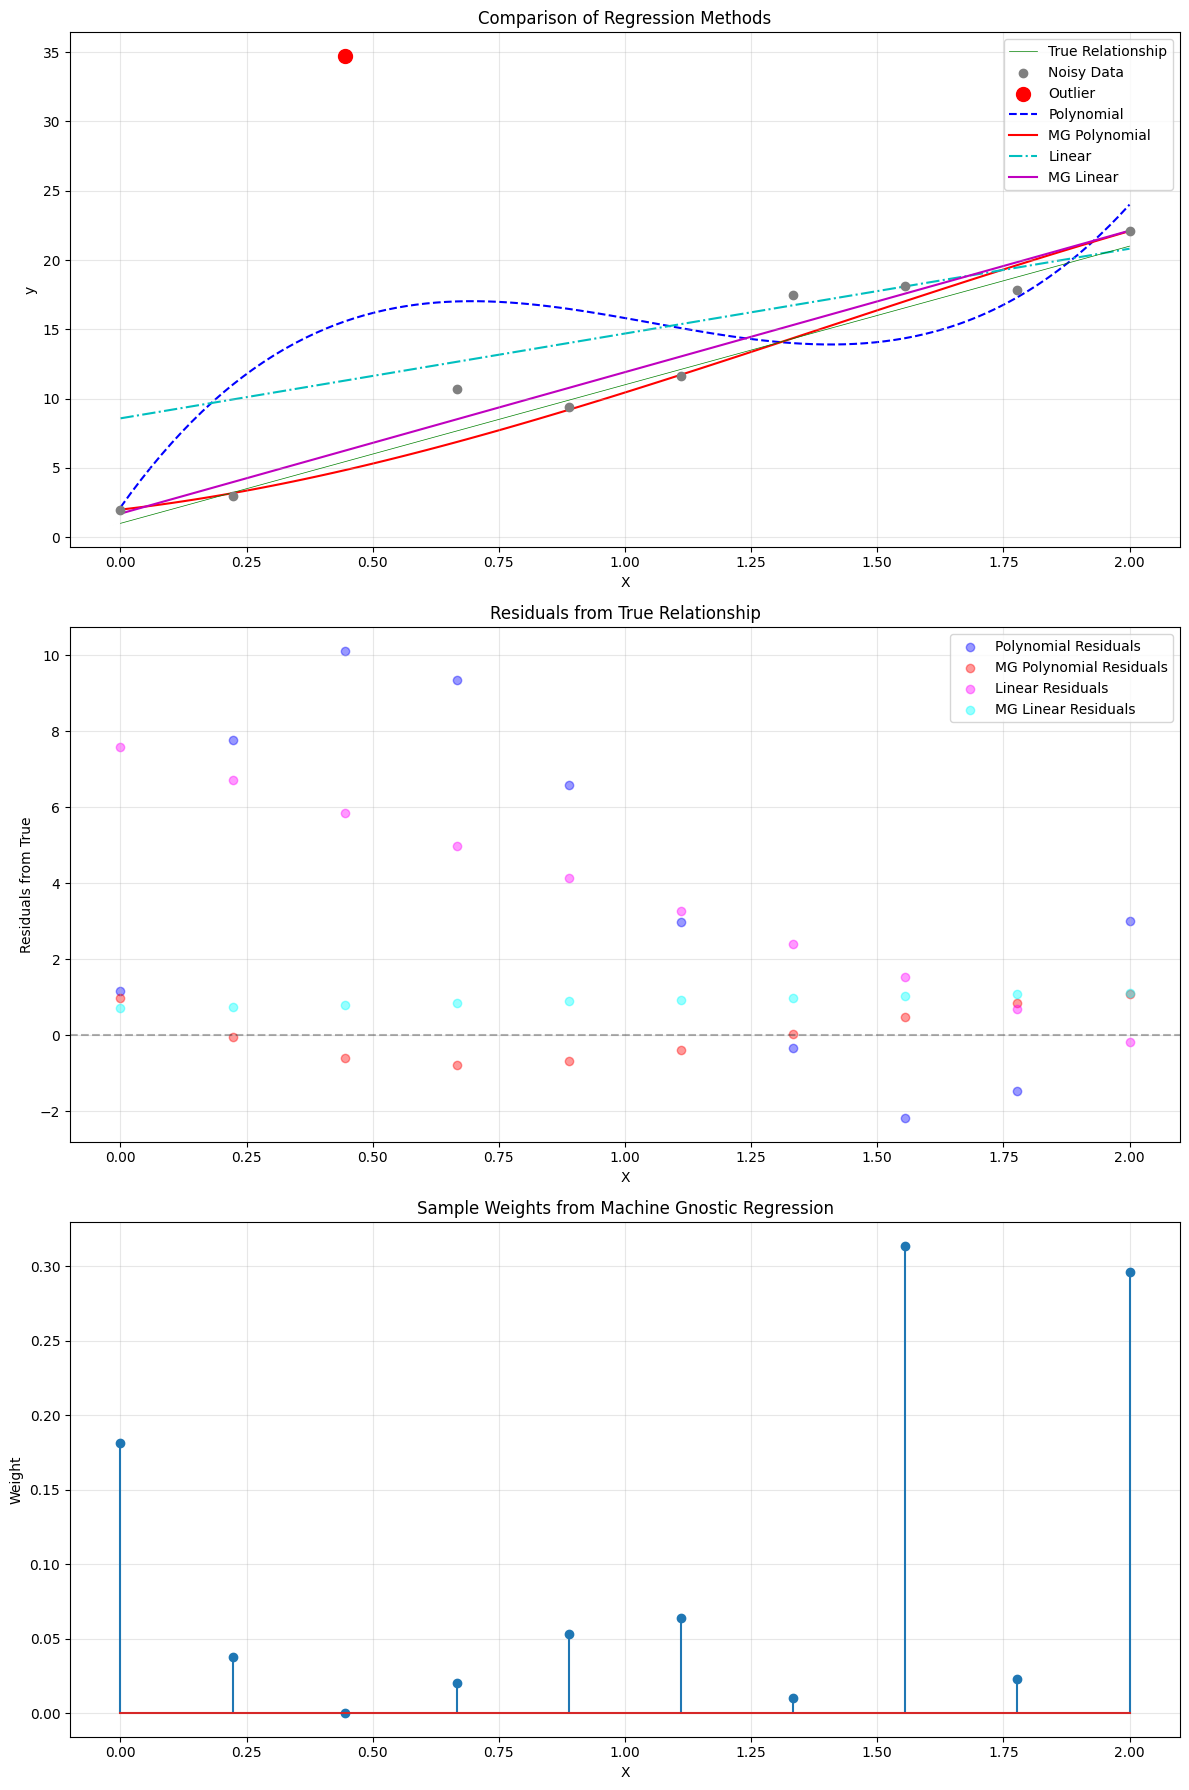

Coefficients:
True:           [Intercept: 1, Slope: 10]
Regular:        [  0.          51.13182115 -54.84299636  17.369313  ]
Sklearn Linear: [6.11971484]
MG Linear:      [ 1.7025096  10.20808035]
Robust MG:      [ 1.99050849  4.16095245  5.63583235 -1.34617167]

MSE against true relationship (excluding outliers):
Regular Polynomial: 38.5847
Sklearn Linear:     24.6826
MG Linear:          0.7583
Robust MG:         0.3558


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from machinegnostics.models.regression import PolynomialRegressor, LinearRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate clean data
X = np.linspace(0, 2, 10).reshape(-1, 1)
y_clean = 10 * X.ravel() + 1  # True linear relationship

# Add controlled noise and outliers
noise = np.random.normal(0, 2, 10)
y_noisy = y_clean + noise
y_noisy[2] = y_noisy[2] + 28.0  # Add outlier

# Create test points for smooth curve
X_test = np.linspace(0, 2, 100).reshape(-1, 1)

degree = 3  # Using degree 1 for linear relationship

# Regular polynomial regression
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X, y_noisy)
y_pred_regular = poly_reg.predict(X)
y_pred_regular_test = poly_reg.predict(X_test)

# Fit robust Machine Gnostics regression
mg_model = PolynomialRegressor(degree=degree)
mg_model.fit(X, y_noisy)
y_pred_robust = mg_model.predict(X)
y_pred_robust_test = mg_model.predict(X_test)

# Fit sklearn LinearRegression (no polynomial features, just linear)
sk_model = LinearRegression()
sk_model.fit(X, y_noisy)
y_pred_sk = sk_model.predict(X)
y_pred_sk_test = sk_model.predict(X_test)

# Fit Machine Gnostics LinearRegressor (no polynomial features, just linear)
mg_linreg = LinearRegressor()
mg_linreg.fit(X, y_noisy)
y_pred_mg_linreg = mg_linreg.predict(X)
y_pred_mg_linreg_test = mg_linreg.predict(X_test)

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

# Plot regression curves
ax1.plot(X, y_clean, 'g-', label='True Relationship', linewidth=0.5)
ax1.scatter(X, y_noisy, color='gray', label='Noisy Data', zorder=2)
ax1.scatter(X[2], y_noisy[2], color='red', s=100, label='Outlier', zorder=3)
ax1.plot(X_test, y_pred_regular_test, 'b--', label='Polynomial', zorder=1)
ax1.plot(X_test, y_pred_robust_test, 'r-', label='MG Polynomial', zorder=1)
ax1.plot(X_test, y_pred_sk_test, 'c-.', label='Linear', zorder=1)
ax1.plot(X_test, y_pred_mg_linreg_test, 'm-', label='MG Linear', zorder=1)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Comparison of Regression Methods')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot residuals from true relationship
residuals_regular = y_pred_regular - y_clean
residuals_robust = y_pred_robust - y_clean
residuals_sk = y_pred_sk - y_clean
residuals_mg_linreg = y_pred_mg_linreg - y_clean
ax2.scatter(X, residuals_regular, color='blue', label='Polynomial Residuals', alpha=0.4)
ax2.scatter(X, residuals_robust, color='red', label='MG Polynomial Residuals', alpha=0.4)
ax2.scatter(X, residuals_sk, color='magenta', label='Linear Residuals', alpha=0.4)
ax2.scatter(X, residuals_mg_linreg, color='cyan', label='MG Linear Residuals', alpha=0.4)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals from True')
ax2.set_title('Residuals from True Relationship')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot sample weights
ax3.stem(X.ravel(), mg_linreg.weights, label='MG Linear Regression Weights')
ax3.set_xlabel('X')
ax3.set_ylabel('Weight')
ax3.set_title('Sample Weights from Machine Gnostic Regression')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print performance metrics
print("Coefficients:")
print(f"True:           [Intercept: 1, Slope: 10]")
print(f"Regular:        {poly_reg.named_steps['linearregression'].coef_}")
print(f"Sklearn Linear: {sk_model.coef_}")
print(f"MG Linear:      {mg_linreg.coefficients}")
print(f"Robust MG:      {mg_model.coefficients}")

# Calculate MSE against true relationship
mse_regular = np.mean((y_pred_regular[:-2] - y_clean[:-2])**2)
mse_robust = np.mean((y_pred_robust[:-2] - y_clean[:-2])**2)
mse_sk = np.mean((y_pred_sk[:-2] - y_clean[:-2])**2)
mse_mg_linreg = np.mean((y_pred_mg_linreg[:-2] - y_clean[:-2])**2)
print("\nMSE against true relationship (excluding outliers):")
print(f"Regular Polynomial: {mse_regular:.4f}")
print(f"Sklearn Linear:     {mse_sk:.4f}")
print(f"MG Linear:          {mse_mg_linreg:.4f}")
print(f"Robust MG:         {mse_robust:.4f}")

## Example 2

model coeff: [ 2.64573373 -2.11707058 12.49262107]


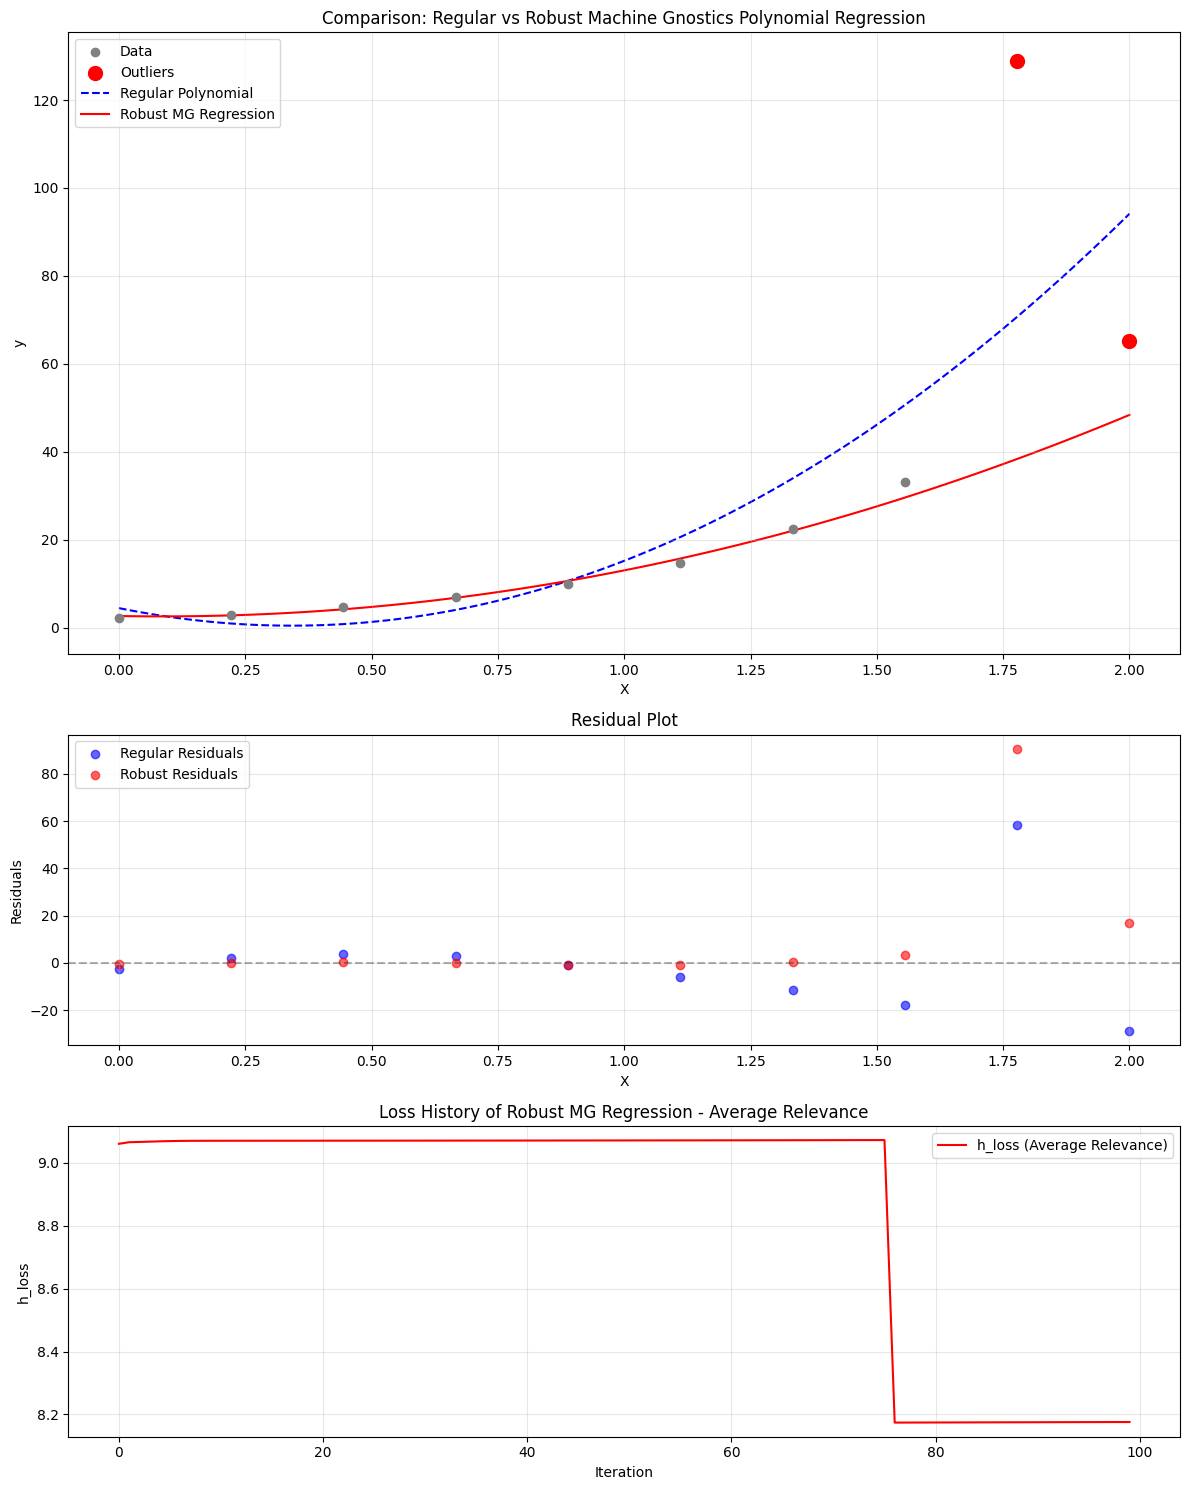

MSE (excluding outliers):
Regular Polynomial: 63.8383
Robust MG Regression: 1.7722

Max Absolute Residuals (excluding outliers):
Regular Polynomial: 17.5910
Robust MG Regression: 3.4612


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from machinegnostics.models.regression import PolynomialRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
X = np.linspace(0, 2, 10).reshape(-1, 1)
y = 2.0 * np.exp(1.8 * X.ravel()) + np.random.normal(0, 0.2, 10)
# y = 2*X +1
y[8:] += [80.0, -8.0]  # Add outliers
# Introduce outliers
# y[8:] += np.array([8.0, -80.0])  # one high outlier, one low outlier

# Create test points for smooth curve
X_test = np.linspace(0, 2, 100).reshape(-1, 1)

# Fit regular polynomial regression
degree = 2
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_reg.fit(X, y)
y_pred_regular = poly_reg.predict(X)  # Predict on training points for residuals
y_pred_regular_test = poly_reg.predict(X_test)  # Predict on test points for curve

# Fit robust Machine Gnostics regression
mg_model = PolynomialRegressor(degree=degree)
mg_model.fit(X, y.flatten())
y_pred_robust = mg_model.predict(X)  # Predict on training points for residuals
y_pred_robust_test = mg_model.predict(X_test)  # Predict on test points for curve
print(f'model coeff: {mg_model.coefficients}')

# Calculate residuals
residuals_regular = y - y_pred_regular
residuals_robust = y - y_pred_robust

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15), height_ratios=[2, 1, 1])

# Plot regression curves
ax1.scatter(X, y, color='gray', label='Data', zorder=2)
ax1.scatter(X[8:], y[8:], color='red', s=100, label='Outliers', zorder=3)
ax1.plot(X_test, y_pred_regular_test, 'b--', label='Regular Polynomial', zorder=1)
ax1.plot(X_test, y_pred_robust_test, 'r-', label='Robust MG Regression', zorder=1)
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Comparison: Regular vs Robust Machine Gnostics Polynomial Regression')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot residuals
ax2.scatter(X, residuals_regular, color='blue', label='Regular Residuals', alpha=0.6)
ax2.scatter(X, residuals_robust, color='red', label='Robust Residuals', alpha=0.6)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')
ax2.legend()
ax2.grid(True, alpha=0.3)

# history

# Plot history of h_loss (average irrelevance) if available
h_loss_history = [
    entry['h_loss'] for entry in mg_model._history
    if entry.get('h_loss') is not None
]

ax3.plot(h_loss_history, color='red', label='h_loss (Average Relevance)')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('h_loss')
ax3.set_title('Loss History of Robust MG Regression - Average Relevance')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# Print mean squared error for both methods (excluding outliers)
mse_regular = np.mean((y_pred_regular[:-2] - y[:-2])**2)
mse_robust = np.mean((y_pred_robust[:-2] - y[:-2])**2)
print(f"MSE (excluding outliers):")
print(f"Regular Polynomial: {mse_regular:.4f}")
print(f"Robust MG Regression: {mse_robust:.4f}")

# Print max absolute residuals (excluding outliers)
max_resid_regular = np.max(np.abs(residuals_regular[:-2]))
max_resid_robust = np.max(np.abs(residuals_robust[:-2]))
print(f"\nMax Absolute Residuals (excluding outliers):")
print(f"Regular Polynomial: {max_resid_regular:.4f}")
print(f"Robust MG Regression: {max_resid_robust:.4f}")